<a href="https://colab.research.google.com/github/PuttupuR/My-Project/blob/main/Breast_Cancer_using_multitple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

Recommended Screening Guidelines:
Mammography. The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.

Women age 40–45 or older who are at average risk of breast cancer should have a mammogram once a year.

Women at high risk should have yearly mammograms along with an MRI starting at age 30.

Some Risk Factors for Breast Cancer
The following are some of the known risk factors for breast cancer. However, most cases of breast cancer cannot be linked to a specific cause. Talk to your doctor about your specific risk.

Age. The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

Personal history of breast cancer. A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

Family history of breast cancer. A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

Genetic factors. Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

Childbearing and menstrual history. The older a woman is when she has her first child, the greater her risk of breast cancer. Also at higher risk are:

Women who menstruate for the first time at an early age (before 12)
Women who go through menopause late (after age 55)
Women who’ve never had children

**Import the necessary libraries**

In [75]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Loading the Dataset**

In [29]:
#importing our cancer dataset
dataset = pd.read_csv('/content/cancer.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


**Explorarory data analysis**

In [30]:
#To check the non-null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
#description of the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
dataset.shape

(569, 33)

In [32]:
#check the null values
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [34]:
dataset.drop('Unnamed: 32',axis =1, inplace = True)

In [ ]:
dataset.drop('id',axis = 1, inplace = True )

In [37]:
# Label Encoding on the sex and smoker column, and changing their data  type to integer

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis']).astype(int)


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

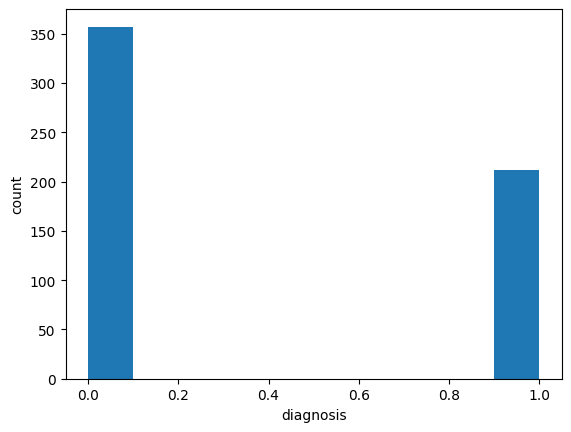

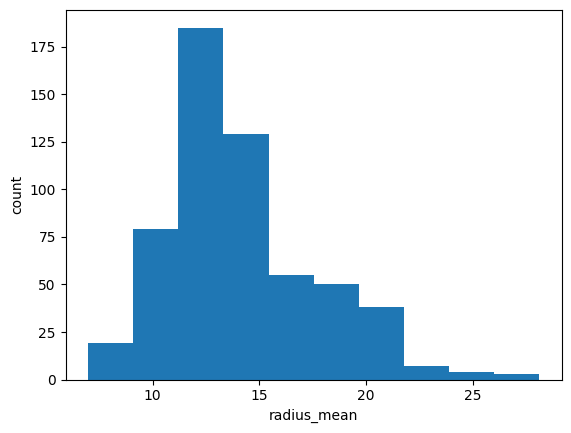

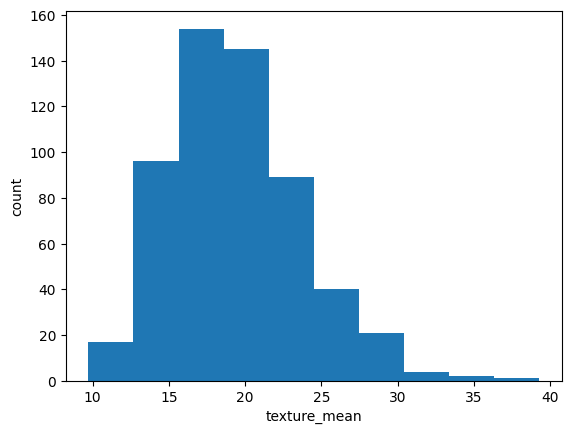

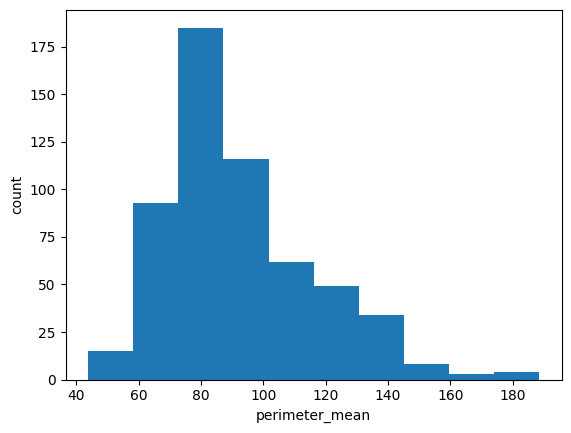

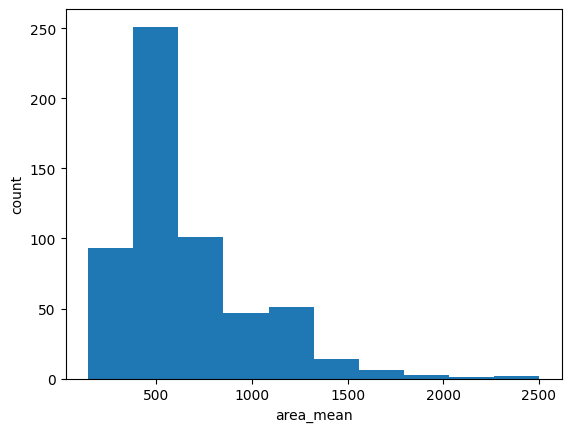

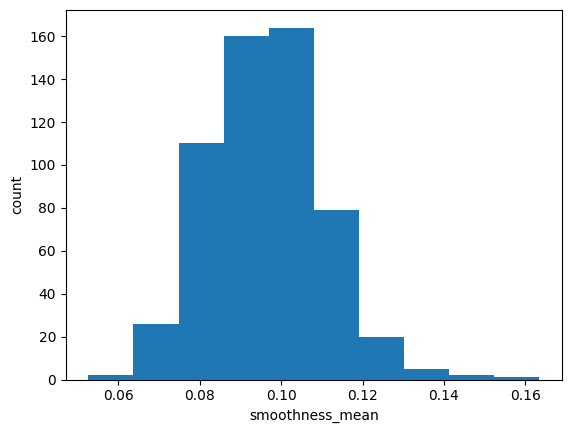

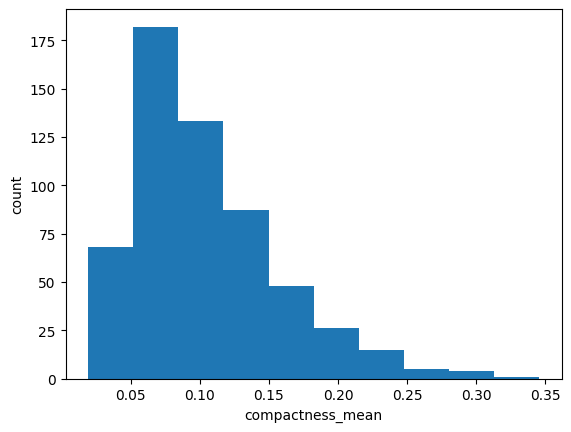

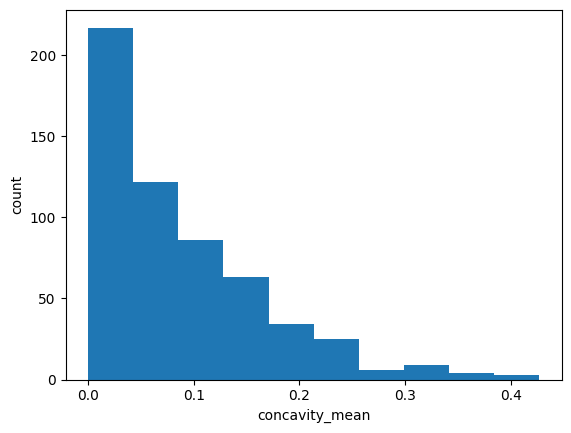

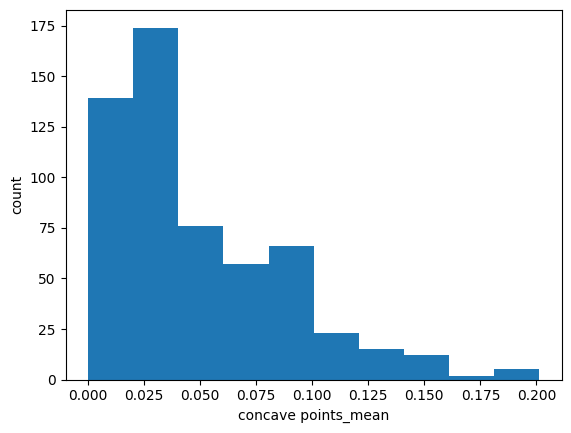

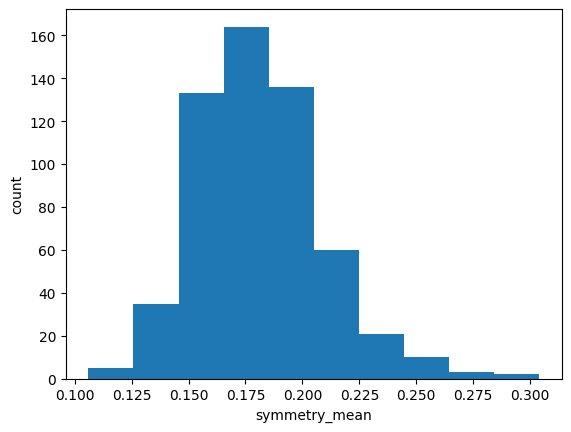

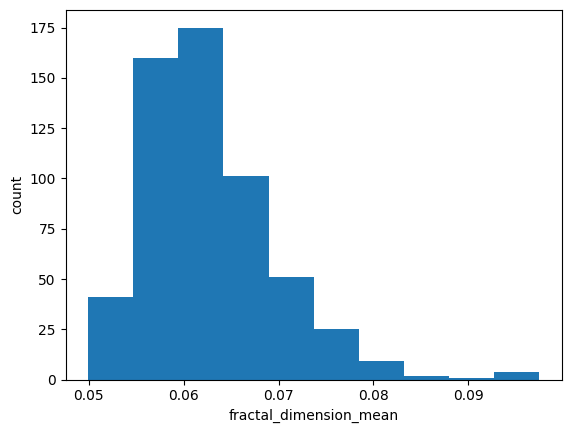

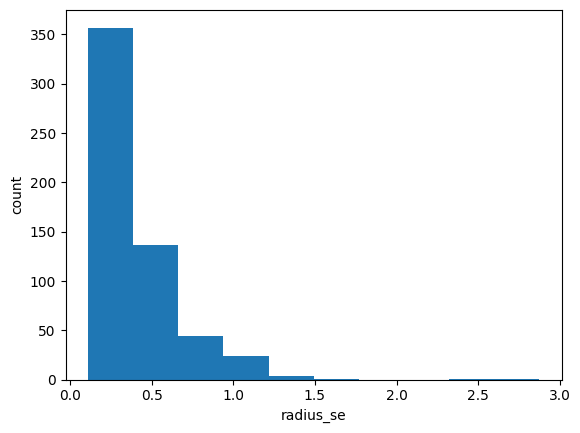

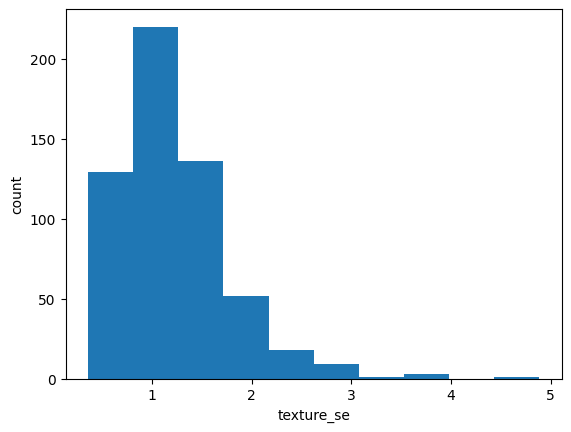

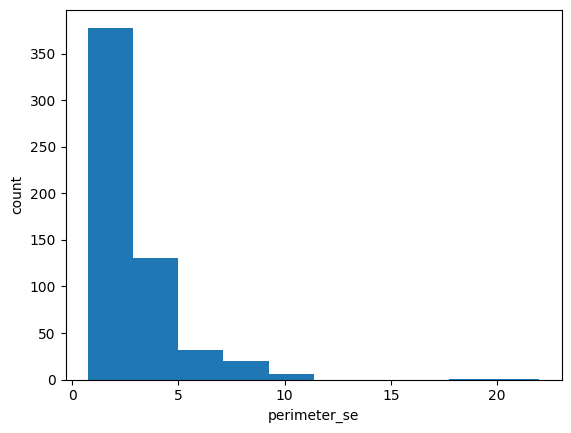

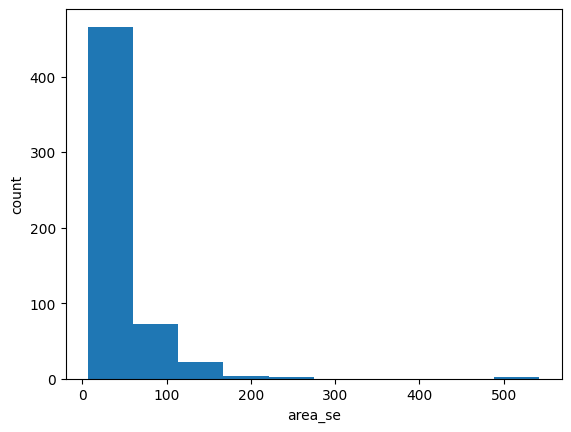

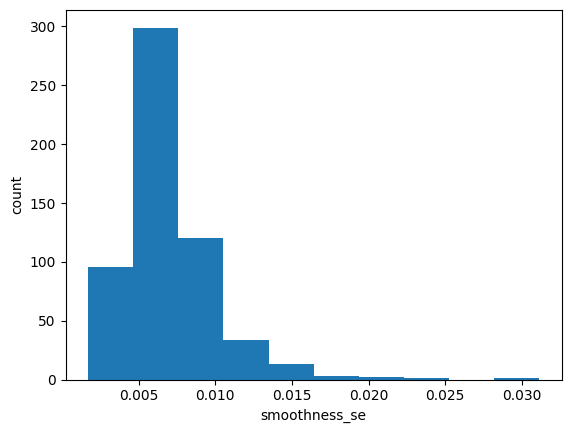

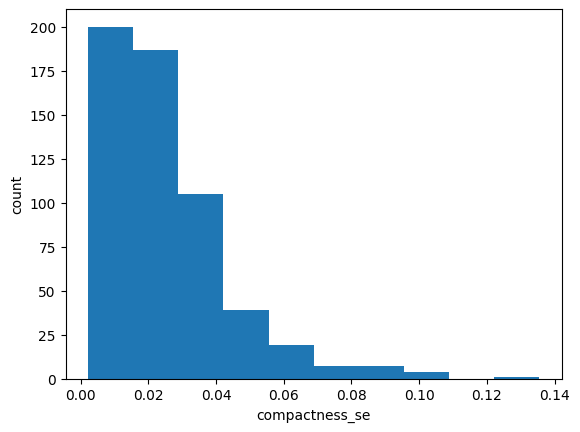

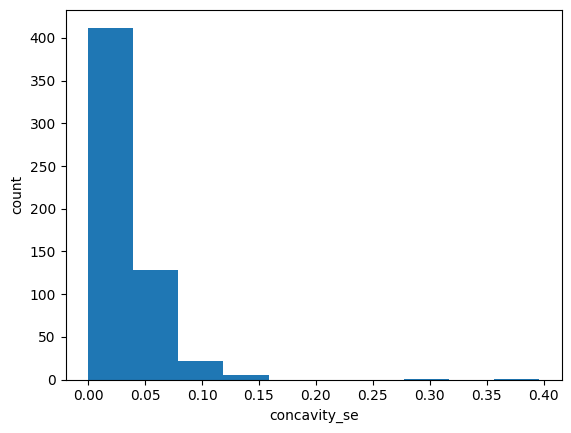

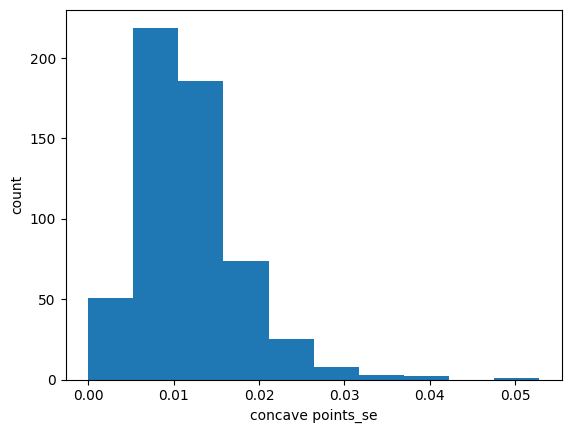

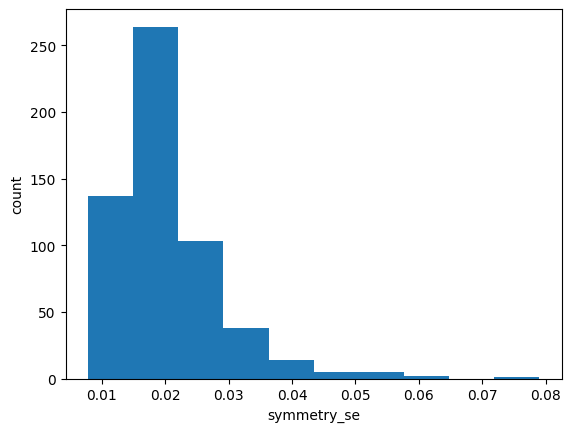

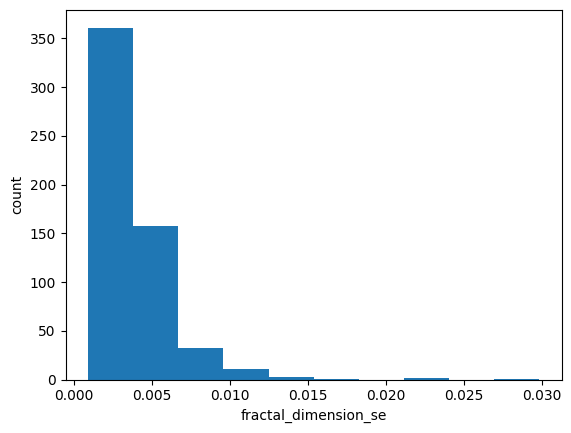

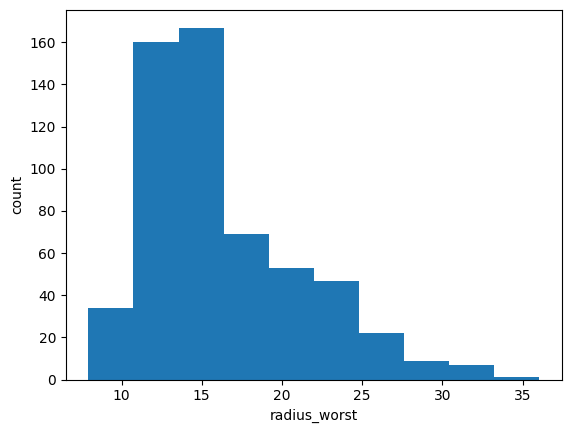

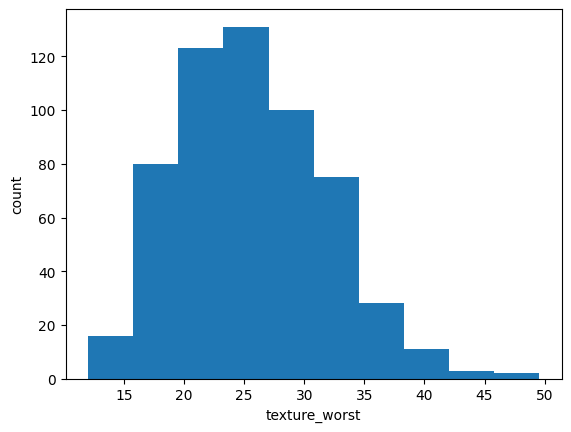

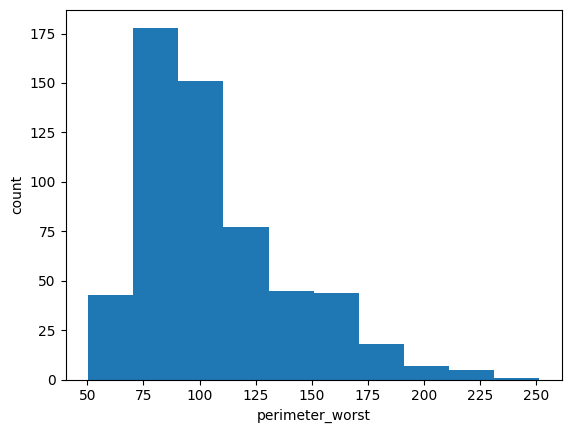

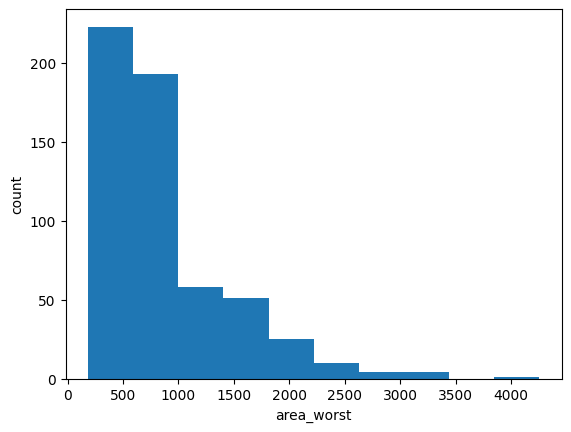

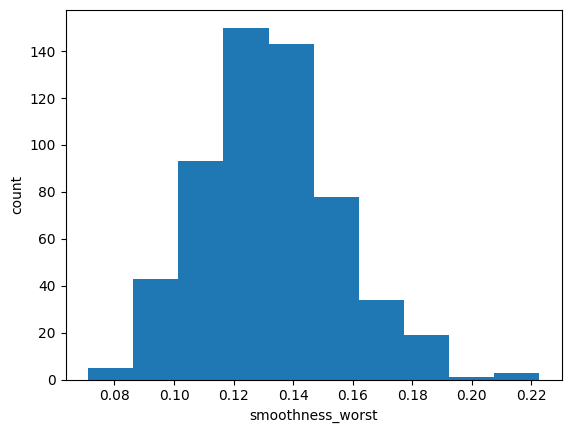

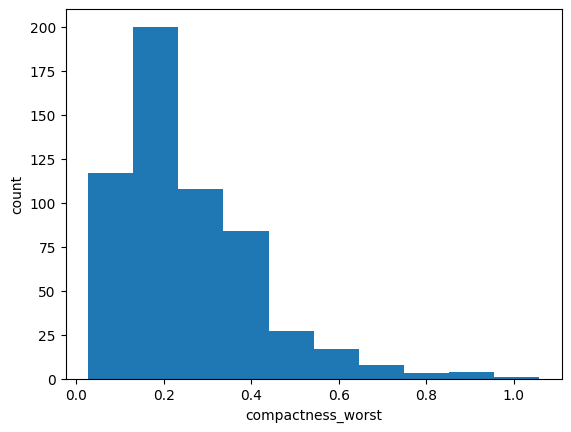

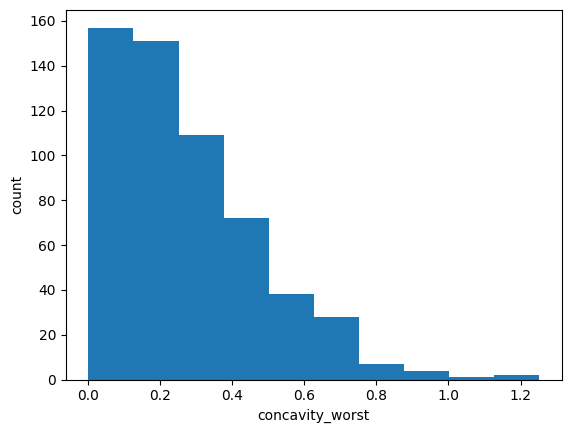

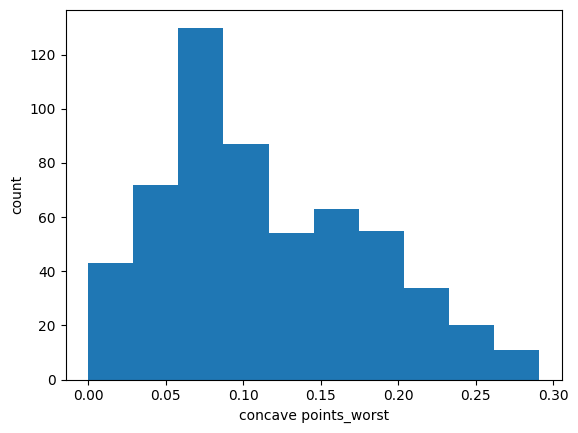

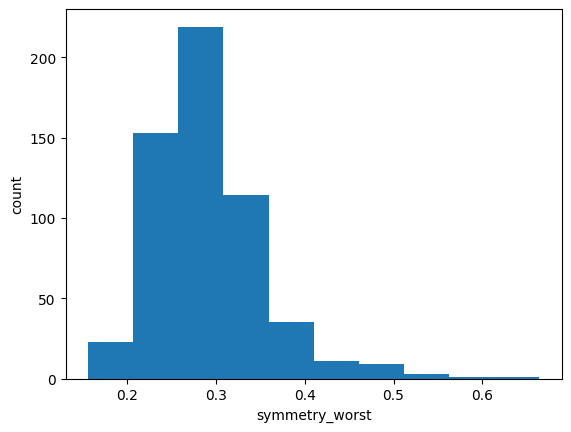

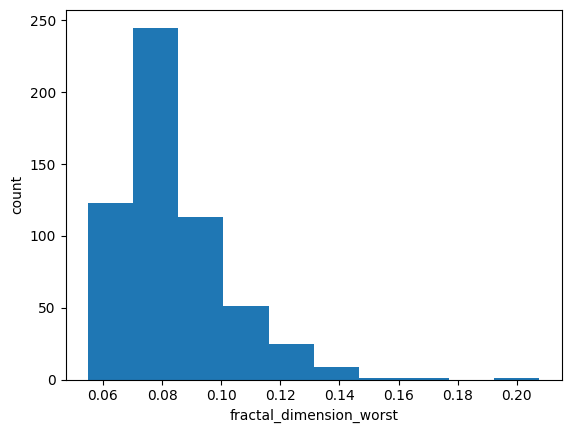

In [74]:
#Distribution of Numerical data
col=list(dataset.columns)
for col_name in col:
  plt.hist(dataset[col_name])
  plt.xlabel(col_name)
  plt.ylabel('count')
  plt.show()

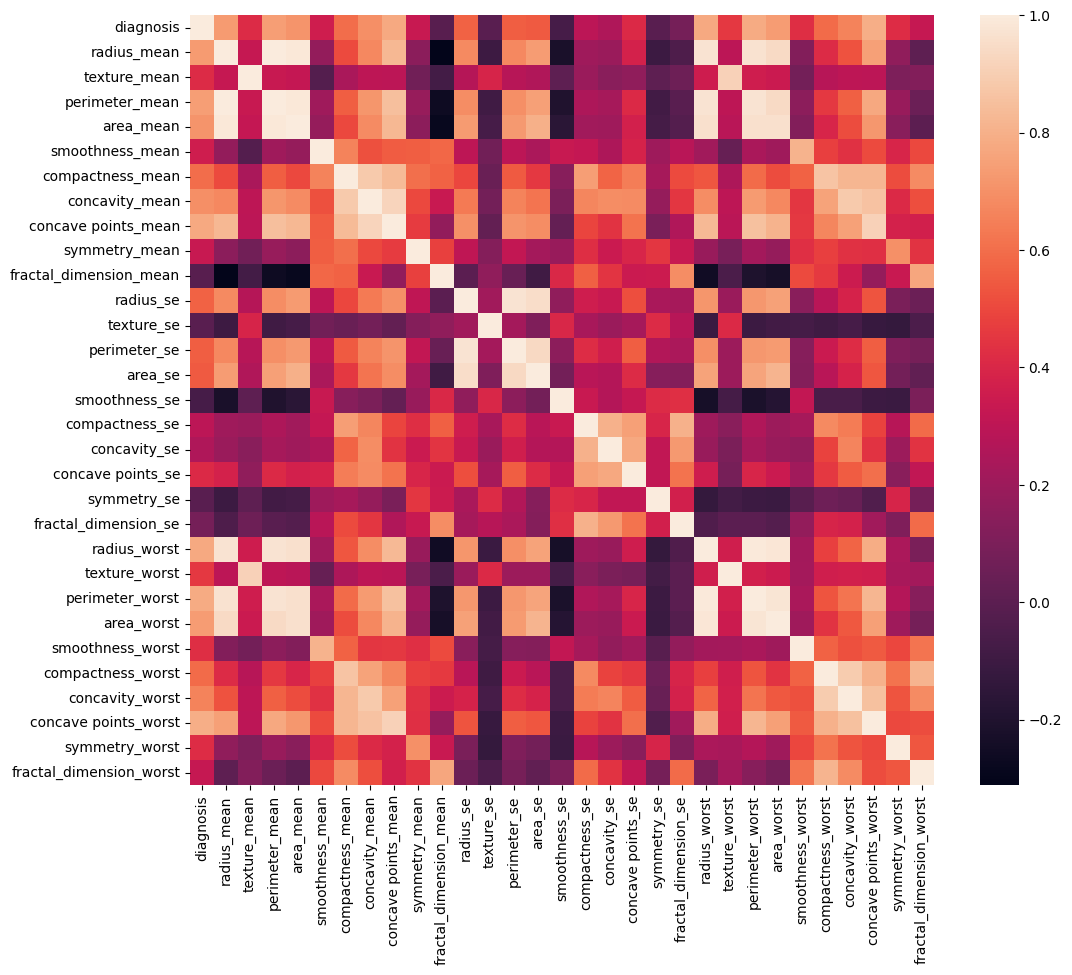

In [76]:
#Feature selection using Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor)
plt.show()

**Seperate the dependent and independent features**

In [ ]:
# X is a independet variable and Y is a dependent variable
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

**Split the dataset into train and test**

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model Selection**

**Logistic Regression**

In [48]:
#Using Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [49]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

**Apply Evaluation metrics**

In [52]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[87  3]
 [ 3 50]]
accuracy score:  0.958041958041958


**KNeighborsClassifier**

In [53]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [55]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[89  1]
 [ 6 47]]
accuracy score:  0.951048951048951


**Support Vector Machine**

In [56]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [57]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [58]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[88  2]
 [ 2 51]]
accuracy score:  0.972027972027972


**SVM using Kernel**

In [60]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [61]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [62]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[88  2]
 [ 3 50]]
accuracy score:  0.965034965034965


**Gaussian of Naive bayes algorithm**

In [63]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [64]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [65]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[84  6]
 [ 6 47]]
accuracy score:  0.916083916083916


**Decision Tree**

In [66]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [68]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[86  4]
 [ 2 51]]
accuracy score:  0.958041958041958


**Random Forest**

In [69]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [70]:
#Predict the values from x_test
Y_pred = classifier.predict(X_test)

In [71]:
#To check the accuracy of the model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print('confusion matrix: ', cm)
print('accuracy score: ', acc)

confusion matrix:  [[89  1]
 [ 1 52]]
accuracy score:  0.986013986013986
